In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install -U opencv-python matplotlib tensorflow tensorflow-hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [3]:
!pip install -q kaggle


In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU kullanılamıyor. Lütfen donanım hızlandırıcısını GPU olarak ayarlayın.')
else:
    print(f'GPU kullanılıyor: {device_name}')

GPU kullanılıyor: /device:GPU:0


In [10]:
from google.colab import files
files.upload()  # kaggle.json dosyasını yükleyin


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"denizarn","key":"e4cbee006b466ed8e55fa90dcc20c232"}'}

In [11]:
import os
print(os.listdir())  # Çalışma dizinindeki dosyaları listeleyin


['.config', 'kaggle.json', 'sample_data']


In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/  # Taşıma yerine kopyalama yapıyoruz
!chmod 600 ~/.kaggle/kaggle.json


In [15]:
!ls -la ~/.kaggle/


total 16
drwxr-xr-x 2 root root 4096 Jan 17 13:18 .
drwx------ 1 root root 4096 Jan 17 13:16 ..
-rw------- 1 root root   64 Jan 17 13:20 kaggle.json


In [16]:
!kaggle datasets list


ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchikakumbhar/obesity-prediction                             Obesity Prediction Dataset                         58KB  2025-01-14 05:31:18           1196         26  1.0              
anandshaw2001/netflix-movies-and-tv-shows                     Netflix Movies and TV Shows                         1MB  2025-01-03 10:33:01           4183        117  1.0              
raedaddala/top-500-600-movies-of-each-year-from-1960-to-2024  30,000+ Movies, 60+ Years of Data, Rich Metadata    4MB  2025-01-05 17:17:05            882         28  1.0              
preetigupta004/cancer-issue                                   Cancer issue      

In [19]:
import zipfile
import os

# ZIP dosyasının yolu
zip_file_path = "/content/car.zip"  # ZIP dosyasının doğru yolunu yazın
extract_to_path = "/content/car_dataset"  # Çıkarılacak klasörün yolu

# ZIP dosyasını çıkarma
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Dosyalar çıkarıldı:", os.listdir(extract_to_path))


Dosyalar çıkarıldı: ['valid', 'data.yaml', 'README.dataset.txt', 'test', 'README.roboflow.txt', 'train']


In [20]:
# Çıkarılan dosyaların incelenmesi
for root, dirs, files in os.walk(extract_to_path):
    print(f"Klasör: {root}")
    for file in files:
        print(f" - {file}")


Klasör: /content/car_dataset
 - data.yaml
 - README.dataset.txt
 - README.roboflow.txt
Klasör: /content/car_dataset/valid
Klasör: /content/car_dataset/valid/images
 - 34f6a140cae07ad1_jpg.rf.PTlOe1oBTOfqadeQiqrx.jpg
 - 5018711812d0dedc_jpg.rf.owMHluW00BnhPgpah4Sn.jpg
 - 488b42427e210e88_jpg.rf.XTOAH2QvnUw7EEdeUFPn.jpg
 - 0013d97a44c586c0_jpg.rf.QohOjYeZzQhUb4dxfAUr.jpg
 - 91173b5d90e594b4_jpg.rf.f19443437a99f20cd070b9f06195ef9e.jpg
 - d50d7d05ebcb572c_jpg.rf.qO1zLNzHCtt8IlrOUAXe.jpg
 - 6a03dd967d836a19_jpg.rf.jZiLdhLoUOWPHBD5c666.jpg
 - 30de441d49bbeedd_jpg.rf.935b9b0506fda047ef745d1e15803eb5.jpg
 - 91173b5d90e594b4_jpg.rf.NaJmTaK8TLqlnRRBaWBl.jpg
 - 11b0e2dddc393e74_jpg.rf.vphKZwfJIqRHJqmIxPN7.jpg
 - cd6745ae4dc907c8_jpg.rf.2c7d8d5333c9461391cf0f9eaf20ca2e.jpg
 - be613907a0a28d0a_jpg.rf.36ef2c64ce15b8493c719b28b592b114.jpg
 - 1f133e6ee29e99d0_jpg.rf.LSDdfZGLMPOupotMQr2C.jpg
 - d330b27e8b7e1603_jpg.rf.39afcc8d19f766c7778663572e05416a.jpg
 - 5dc06abba45063b5_jpg.rf.PeOJiuM6aiPTgJ5VrkN3.

In [22]:
import cv2
import matplotlib.pyplot as plt
import os

# ZIP dosyasının yolu
zip_file_path = "/content/car.zip"  # ZIP dosyasının doğru yolunu yazın
extract_to_path = "/content/car_dataset"  # Çıkarılacak klasörün yolu

# Örnek bir görüntü dosyasının yolu - dataset içindeki bir dosyanın doğru yolunu belirtin
# Örneğin:
image_path = os.path.join(extract_to_path, "car", "car1.jpeg")  # "car1.jpeg" dosyasını kontrol edin, var mı?

# Resmi oku
image = cv2.imread(image_path)

# Resmi okuma başarısız olursa hata ver
if image is None:
    print(f"Hata: Resim '{image_path}' yolunda bulunamadı veya okunamadı.")
    # dataset içindeki dosyaları listeleyin
    print("Dataset içindeki dosyalar:")
    for root, dirs, files in os.walk(extract_to_path):
        for file in files:
            print(os.path.join(root, file))
else:
    # Görüntüyü görselleştirelim
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Eksenleri gizle
    plt.show()

Hata: Resim '/content/car_dataset/car/car1.jpeg' yolunda bulunamadı veya okunamadı.
Dataset içindeki dosyalar:
/content/car_dataset/data.yaml
/content/car_dataset/README.dataset.txt
/content/car_dataset/README.roboflow.txt
/content/car_dataset/valid/images/34f6a140cae07ad1_jpg.rf.PTlOe1oBTOfqadeQiqrx.jpg
/content/car_dataset/valid/images/5018711812d0dedc_jpg.rf.owMHluW00BnhPgpah4Sn.jpg
/content/car_dataset/valid/images/488b42427e210e88_jpg.rf.XTOAH2QvnUw7EEdeUFPn.jpg
/content/car_dataset/valid/images/0013d97a44c586c0_jpg.rf.QohOjYeZzQhUb4dxfAUr.jpg
/content/car_dataset/valid/images/91173b5d90e594b4_jpg.rf.f19443437a99f20cd070b9f06195ef9e.jpg
/content/car_dataset/valid/images/d50d7d05ebcb572c_jpg.rf.qO1zLNzHCtt8IlrOUAXe.jpg
/content/car_dataset/valid/images/6a03dd967d836a19_jpg.rf.jZiLdhLoUOWPHBD5c666.jpg
/content/car_dataset/valid/images/30de441d49bbeedd_jpg.rf.935b9b0506fda047ef745d1e15803eb5.jpg
/content/car_dataset/valid/images/91173b5d90e594b4_jpg.rf.NaJmTaK8TLqlnRRBaWBl.jpg
/conte

In [23]:
import os

# Görselleri ve etiket dosyalarını ayrı dizilere yerleştirme
image_files = []
label_files = []

for root, dirs, files in os.walk("/content/car_dataset"):
    for file in files:
        if file.endswith((".jpg", ".png")):  # Görseller
            image_files.append(os.path.join(root, file))
        elif file.endswith((".txt", ".json")):  # Etiketler
            label_files.append(os.path.join(root, file))

print(f"Toplam görsel sayısı: {len(image_files)}")
print(f"Toplam etiket dosyası: {len(label_files)}")


Toplam görsel sayısı: 1254
Toplam etiket dosyası: 1256


In [24]:
import tensorflow as tf
import tensorflow_hub as hub

# SSD Mobilenet V2 modelini yükleme
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
detector = hub.load(model_url)
print("Model yüklendi.")


Model yüklendi.


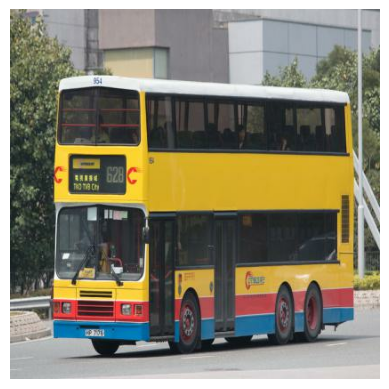

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Bir test görselini yükleme
image_path = image_files[0]  # İlk görseli seçiyoruz
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)

# Görseli modele göndermek için yeniden boyutlandırma
input_tensor = tf.image.resize(image, (640, 640))
input_tensor = tf.cast(input_tensor, dtype=tf.uint8)  # Veri tipini uint8'e çeviriyoruz
input_tensor = input_tensor[tf.newaxis, ...]  # Batched tensor

# Model tahmini
detections = detector(input_tensor)

# Tahmin edilen nesneleri görselleştirme
plt.imshow(image.numpy())
plt.axis("off")
plt.show()


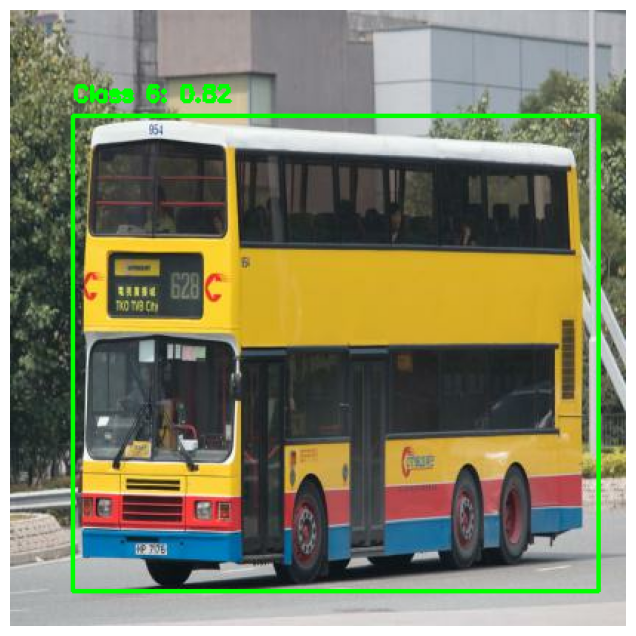

In [27]:
import matplotlib.pyplot as plt
import cv2

# Tahmin edilen bounding box, sınıf ve skorları alma
boxes = detections['detection_boxes'][0].numpy()  # Çerçeveler
classes = detections['detection_classes'][0].numpy().astype(int)  # Sınıf etiketleri
scores = detections['detection_scores'][0].numpy()  # Skorlar

# Eşik değeri (ör. 0.5'ten yüksek güven skorlarını göstermek için)
threshold = 0.5

# Görseli numpy formatına dönüştürme ve kopyalama
image_np = image.numpy()
image_np_with_detections = image_np.copy()

# Çerçeve çizme
for i in range(len(boxes)):
    if scores[i] >= threshold:
        # Çerçeve koordinatlarını çözme
        ymin, xmin, ymax, xmax = boxes[i]
        start_point = (int(xmin * image_np.shape[1]), int(ymin * image_np.shape[0]))
        end_point = (int(xmax * image_np.shape[1]), int(ymax * image_np.shape[0]))

        # Çerçeve çizimi
        color = (0, 255, 0)  # Yeşil çerçeve
        thickness = 2
        image_np_with_detections = cv2.rectangle(image_np_with_detections, start_point, end_point, color, thickness)

        # Sınıf etiketini ekleme
        label = f"Class {classes[i]}: {scores[i]:.2f}"
        image_np_with_detections = cv2.putText(
            image_np_with_detections,
            label,
            (start_point[0], start_point[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            color,
            thickness
        )

# Görseli çizdirme
plt.figure(figsize=(12, 8))
plt.imshow(image_np_with_detections)
plt.axis("off")
plt.show()
